In [1]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
# sklearn의 linear_model 안에 있는 LinearRegression estimator 사용

# 학습데이터 준비

In [2]:
# reshape 코드 입력
X = np.arange(1,30,10).reshape(-1,1) 
y = (2*X + 1)

In [3]:
X  # X_train = training data set

array([[ 1],
       [11],
       [21]])

In [16]:
y   # y_train = training data set

array([[17],
       [25],
       [31],
       [51],
       [17],
       [ 7],
       [57],
       [51],
       [59],
       [35]])

<AxesSubplot:>

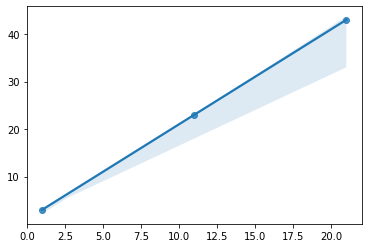

In [4]:
sns.regplot(x=X, y=y) # X와 y의 관계성 확인

# 모델의 선언 및 학습(fit)

In [5]:
# 모델 선언(모델 객체 생성 - estimator로 객체 생성한다)
model_lr = LinearRegression()

In [6]:
# 모델 확인 - 객체 = model_lr
model_lr
# 설정되어 있는 hyper parameter 값 확인(param 값에 따라 성능 달라짐)

LinearRegression()

In [7]:
# fit 메소드로 모델 학습 
model_lr.fit(X,y)
# model_lr이 알고리즘 학습한 지능(모델) 그 자체이기 때문에 a = model_lr 하면 안됨(return값 아니니까)

LinearRegression()

In [8]:
# 학습외의 데이터를 입력하여 결과를 예측함
prediction = model_lr.predict([[50],[67]]) # X_test = [50, 67] = Test dataset
# 모델에 넣어 출력한 예측치를 return 하기 위해 prediction 변수에 저장

In [9]:
prediction   # y hat = target = label

array([[101.],
       [135.]])

# 다른 데이터셋을 넣어보자

In [11]:
X = np.random.randint(1,30,10).reshape(-1,1)
y = 2 * X + 1

In [12]:
X

array([[ 8],
       [12],
       [15],
       [25],
       [ 8],
       [ 3],
       [28],
       [25],
       [29],
       [17]])

In [13]:
model_lr = LinearRegression()
model_lr.fit(X,y)

LinearRegression()

In [14]:
prediction = model_lr.predict([[20],[33]])

In [15]:
prediction

array([[41.],
       [67.]])

# EDA 수행 및 머신러닝 학습모델 만들기 기본 익히기
- 가장 y를 잘 뽑아낼 수 있는 특징값 만들기
- 가장 상관관계가 있는 features를 추출

In [17]:
import numpy as np
import pandas as pd

In [19]:
train = pd.read_csv('./data/titanic_clean.csv')

In [22]:
train.head(-5) # 데이터의 맨 뒷줄에 있는 5줄을 빼고 출력
# -5를 param으로 넣으면 앞 뒤 데이터를 모두 볼 수 있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3.0,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,B96 B98,S,1,2,0,0,1
882,883,0,3.0,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,B96 B98,S,0,2,0,0,1
883,884,0,2.0,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,B96 B98,S,1,2,0,0,1
884,885,0,3.0,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,B96 B98,S,1,2,0,0,1


In [21]:
train.describe() # 기술 통계 값 반드시 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num,E_C,E_Q,E_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.305776,29.699118,0.523008,0.381594,32.204208,0.647587,1.536476,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.832919,13.002015,1.102743,0.806057,49.693429,0.477990,0.791503,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,2.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,1.000000,1.000000,1.000000


In [23]:
train.info() # 891 entries = 모든 column의 count가 891 : 결측치가 없는 데이터
# object = 문자열 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    float64
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Sex_num       891 non-null    int64  
 13  Embarked_num  891 non-null    int64  
 14  E_C           891 non-null    int64  
 15  E_Q           891 non-null    int64  
 16  E_S           891 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 118.5+ KB


In [24]:
#실수형으로 되어 있는 Pclass를 정수 type으로 변환
train['Pclass'] =train['Pclass'].astype(int)

In [25]:
#실수형으로 되어 있는 나이를 정수 type으로 변환
train['Age'] = train['Age'].astype(int) # astype = 데이터타입을 변환해주는 함수

In [26]:
train.columns # column labels 확인 가능 -> 더블 클릭 해서 copy&paste하기 위해 많이 사용

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt import만 하면 seaborn을 그릴때 plt 반영되어 그려짐

In [29]:
df_eda=train.loc[:,'PassengerId':'Embarked']      
#loc = lable name으로 slicing, iloc = index num으로 slicing

In [30]:
# 서로 다른 features 간에 어떤 선형적 관계가 있는가
df_eda.corr()['PassengerId':'Fare'] # corr = df간의 상관관계(음 or 양의 상관관계)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.025124,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.334241,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.025124,-0.334241,1.000000,-0.334923,0.082875,0.021693,-0.547980
Age,0.033741,-0.067809,-0.334923,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.082875,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.021693,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.547980,0.093856,0.159651,0.216225,1.000000


<AxesSubplot:>

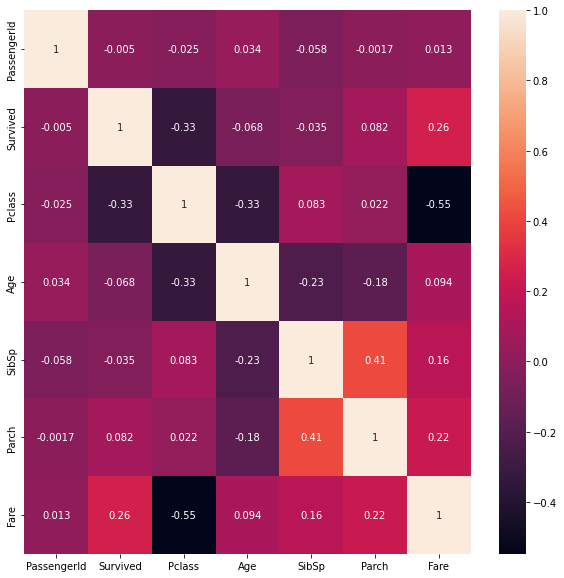

In [31]:
# 위의 수치값을 직관적으로 보기 위해 heatmap()으로 시각화 - 두 독립변수 간의 관계
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_eda.corr(), annot=True)
# heatmap에 corr 적용할 때에는 annot와 color 정도만 지정하기, vmin과 vmax 등을 지정하면 오히려 해석 힘들어짐

# 위 heatmap 을 어떻게 해석해야 할까?
- 0과 가까우면 두 독립변수는 서로 관계 없음
- survived 와 Pclass의 corr는 -0.33 = 음의 상관관계(등급이 높을 수록 생존 확률 낮음)

<AxesSubplot:>

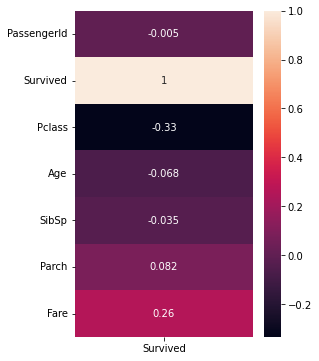

In [32]:
# survived가 target - 따라서 survived와 다른 features 간 관계를 시각화
fig = plt.figure(figsize=(4, 6))
sns.heatmap(df_eda.corr()[['Survived']], annot=True)
# 생존율 - pclass와 음의 상관관계, age 또는 SibSp 등과는 큰 상관관계 없음

## 각 feature와 생존(Survived)과의 관계 시각화

In [33]:
df_eda.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
df_eda['Pclass'].value_counts() 
# count 수보다는 해당 column을 구성하고 있는 값(1등급, 2등급...) 확인하기 위해 사용

3    485
1    215
2    191
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

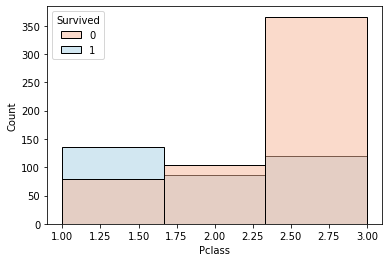

In [35]:
# seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 생존과의 관계를 시각화
sns.histplot(x='Pclass', data=df_eda, hue='Survived', palette='RdBu',bins=3)
# x축(Pclass)에 해당하는 count 값 출력
# hue값을 주면 Pclass별 생존자수를 확인할 수 있음

<AxesSubplot:xlabel='Sex', ylabel='Count'>

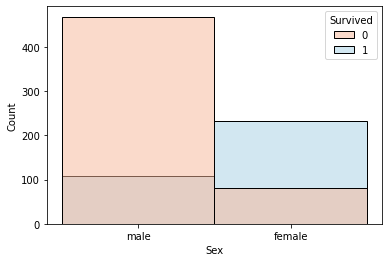

In [36]:
sns.histplot(x='Sex', data=df_eda, hue='Survived', palette='RdBu',bins=2)
# eda = x축의 feature값을 계속 바꿔주면서 목표 값(survived)과 어떤 관계가 있는지 탐색

<AxesSubplot:xlabel='Age', ylabel='Count'>

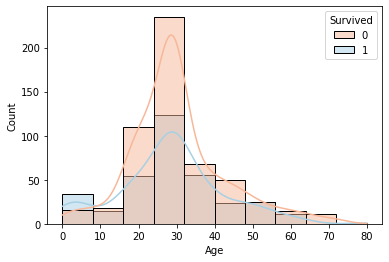

In [37]:
sns.histplot(x='Age', data=df_eda, hue='Survived', palette='RdBu',bins=10, kde=True)
# 결론 = 특징을 잘 반영하는 columns만 취하기
# bins 값을 어떻게 주느냐에 따라서도 insight 달라짐

<AxesSubplot:xlabel='Fare', ylabel='Count'>

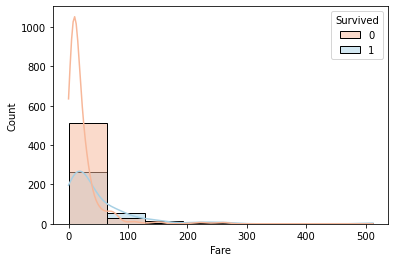

In [38]:
sns.histplot(x='Fare', data=df_eda, hue='Survived', palette='RdBu', bins=8, kde=True)

In [40]:
df_eda['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
df_eda

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Embarked', ylabel='Count'>

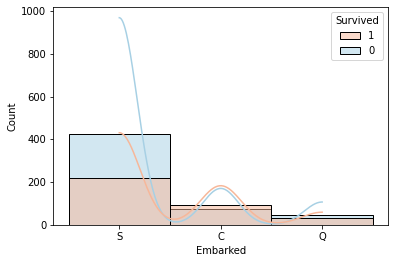

In [71]:
sns.histplot(data=df_eda, x='Embarked',  hue='Survived', bins=3, kde=True, palette='RdBu', 
              hue_order=[1,0])

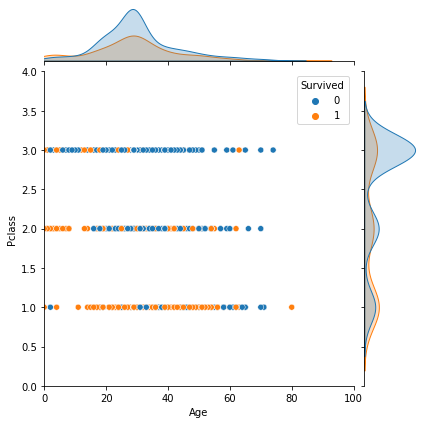

In [39]:
sns.jointplot(x='Age', y='Pclass', data=df_eda, hue='Survived', xlim=(0,100),ylim=(0,4))

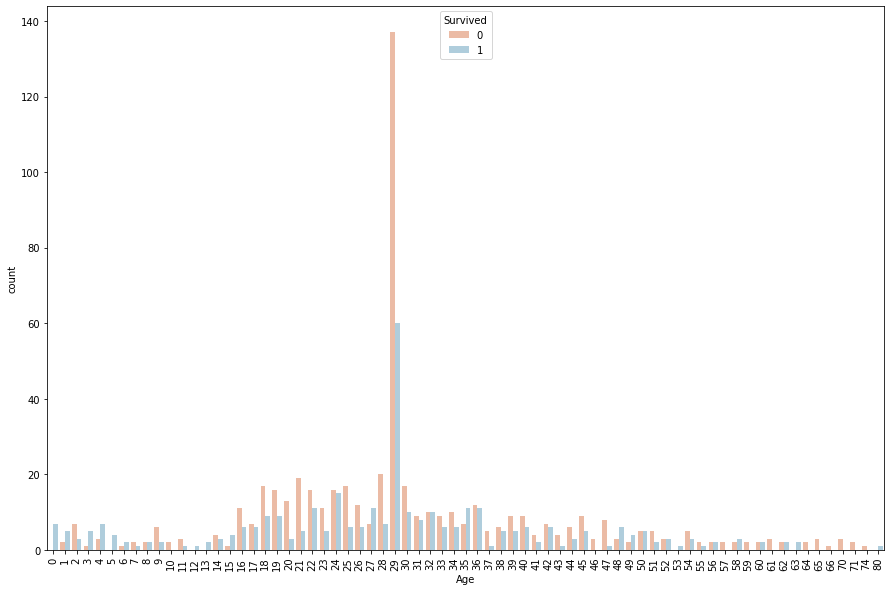

In [69]:
plt.figure(figsize=(15,10)) #sns보다 위쪽라인에 있어야 함.
plt.xticks(rotation=90)
sns.countplot(x='Age', data=df_eda, hue='Survived', palette='RdBu')
plt.show()
# 20대가 타이타닉호에 많이 탑승했고, 생존율 가장 낮음
# 어린 아이들은 생존율 높음

## 전처리: 학습 데이터(feature)와 정답 데이터(label) 구분
- feature(X)와 lable(y) 정의하기
- feature, label을 정의했으면, 적절한 비율로 train/validation set 나누기

In [48]:
# feature(X)의 항목 list
feature = ['Pclass', 'Sex_num', 'Age', 'Fare', 'E_C', 'E_Q', 'E_S']
X = train[feature]

In [72]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S,1,2,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,0,2,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,B96 B98,S,0,2,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1,0,1,0,0


In [49]:
# label(y)의 항목
label = 'Survived'
y = train[label]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
# train/validation 세트 나누기
from sklearn.model_selection import train_test_split

In [52]:
# 데이터 분할할 때 꼭 순서대로 적어서 헷갈리지 않게 하기 - return받는 데이터 순서 꼭 지키기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# 전체 데이터 사이즈를 1로 봤을 때 default는 0.25 
# but, test_size를 0.2(즉, 전체 데이터의 20%)로 설정하면 train data size 자동으로 결정됨
# shuffle = True 가 default -> shuffle 사용하면 random_state 값(=random seed) 입력해줘야 한다

In [53]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(668, 7) (668,)
(223, 7) (223,)


In [54]:
from sklearn.linear_model import SGDClassifier

In [55]:
model_sgd = SGDClassifier(random_state=0) # random_state = random_seed 값
model_sgd

SGDClassifier(random_state=0)

In [56]:
model_sgd.fit(X_train, y_train) # fit은 학습시키는 모델이므로 x,y 모두 train data set을 넣어야 한다

SGDClassifier(random_state=0)

In [57]:
pred = model_sgd.predict(X_test) # fit을 통해 AI가 만들어졌음 -> 따라서, AI로 예측을 할 때에는 test data를 넣어야 한다.
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [58]:
y_test # x_test, y_test 모두 train_test_split 함수에서 설정한 값으로부터 나옴(test_size=0.25)

590    0
131    0
628    0
195    1
230    1
      ..
12     0
203    0
84     1
886    0
759    1
Name: Survived, Length: 223, dtype: int64

In [59]:
# 실제값과 예측값을 맞춘 평균 비율
(pred == y_test).mean() # pred와 y_test가 일치하는 경우가 전체의 약 67%(즉 accuracy가 67%임)

0.6681614349775785

In [60]:
from sklearn.metrics import classification_report
# y와 y hat을 비교해서 성능 평가해줌
# y는 정답(즉, 우리가 원하는 값 target), y hat은 AI 알고리즘이 예측한 값 -> y - y hat = loss = cost = error 

In [61]:
print(classification_report(y_test, pred))
# precision, recall, f1-score , support 모두 성능을 평가하는 알고리즘(함수)
# f1-score의 accuracy = (pred == y_test).mean() = 0.67 

              precision    recall  f1-score   support

           0       0.67      0.97      0.79       147
           1       0.58      0.09      0.16        76

    accuracy                           0.67       223
   macro avg       0.63      0.53      0.48       223
weighted avg       0.64      0.67      0.58       223



In [62]:
# SGD모델 - param에 따라 학습률이 달라짐
# paeam을 바꿔가며 최적의 값을 찾아가자
model_sgd.classes_

array([0, 1])

In [63]:
model_sgd.coef_.shape

(1, 7)

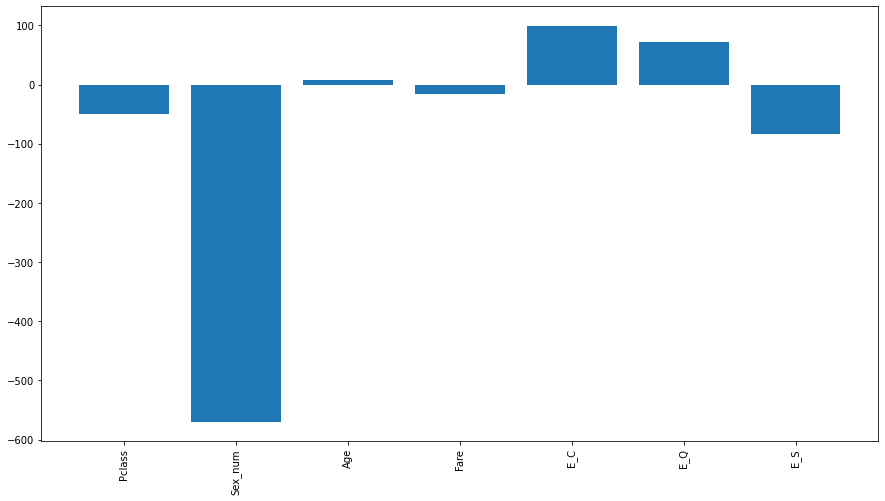

In [64]:
# sgd 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_sgd.coef_[0,:])
plt.xticks(rotation=90)
plt.show()
# 여성이 남성보다 생존율 훨씬 높았음 : 따라서, 아래 plot에서 sex가 기여도 가장 높게 나옴

# [실습] 결정트리 학습모델 만들기, 예측하기, 성능평가

In [65]:
# 여러 classifier 를 적용해보고 가장 accuracy가 높은 classifier 채택
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print('예측 정확도: %.2f' % accuracy_score(y_test, y_pred))
# accuracy_score함수 + 소수 자릿수 지정해주면 
# 아래의 classification_report 와 같은 기능 수행 -> 예측 정확도 출력해줌

예측 정확도: 0.79


In [66]:
# Predict를 수행하고 classification_report() 결과 출력하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       147
           1       0.71      0.66      0.68        76

    accuracy                           0.79       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223

